# Different Approaches to Defining Neural Networks with Keras and TensorFlow

[TensorFlow](https://www.tensorflow.org/) 2.0 came with many new exciting updates. One of these updates was full integration with the very popular [Keras API](https://keras.io/) for developing deep learning models. Before TensorFlow 2.0, you had two install TensorfFlow and Keras separately. Now, Keras comes as a submodule of TensorFlow (*i.e.*, tensorflow.keras). We will be using Keras and TensorFlow on the majority of tutorials in this class. There are 3 ways to define Neural Networks with Keras. In this tutorial we will cover these different ways.

The learning goals of this tutorial are:
    - Introduce the Keras sequential API, functional API and model subclassing methods for defining neural networks;
    - Illustrate a simple classiifcation problem using the Iris dataset.


# Importing Python Libraries 

If you get an error that a library is not installed, most libraries you can stall on a jupyter notebook by creating a new cell and typing:

- *! pip install library_name*


In [1]:
%matplotlib inline 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris  # Function for loading the Iris dataset
from sklearn.model_selection import train_test_split # Function for splitting the dataset

# Data exploration

In [2]:
# Load the dataset and return to the defined variable 
dataset = load_iris()

In [3]:
# Load iris data into a DataFrame
dframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# add "target_label" column to the dataset and name it "label"
dframe['labels'] = dataset.target.astype(int) # Labels are represented as integers
# use of String label
dframe['label_names'] = dframe.labels.replace(dict(enumerate(dataset.target_names)))

In [4]:
# Prints the 5 first rows/samples of the dataset
dframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
# Generates a short description of the dataset (missing values, mean values, etc.)
dframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Train, Validation and Test Sets Split

In [6]:
# Extracting the features and labels from the dataset 
X = np.asarray(dframe[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
Y = np.asarray(dframe['labels'])

# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
train_split = np.int(0.5*Y.size)
val_split = np.int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

## Data Normalization

In [7]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# 1. Change the min-max normalization above by standardization ((X - mean)/(std))
# 2. Don't normalize the data and see what happens
####################################################################################

## Representing Labels using one-hot-ecoding

In [8]:
k = np.unique(Y).size
Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[0 2 1 1 1]

Y_oh_train[:5]=
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [9]:
print( "Size of X_train : " , X_train.shape)
print( "Size of X_val : " , X_val.shape)
print( "Size of X_test : " , X_test.shape)

Size of X_train :  (75, 4)
Size of X_val :  (37, 4)
Size of X_test :  (38, 4)


## Different Approaches for Defining Neural Networks

### 1. The Sequential API

In [10]:
from tensorflow.keras.models import Sequential 
# Passing a list of layers to the constructor
model = Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(4,) , name = "layer1"),
    tf.keras.layers.Dense(10, activation='relu' , name = "layer2"),
    tf.keras.layers.Dense(3, activation='softmax', name = "layer3"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 5)                 25        
_________________________________________________________________
layer2 (Dense)               (None, 10)                60        
_________________________________________________________________
layer3 (Dense)               (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


### 2. The Functional API

In [11]:
from tensorflow.keras.models import Model
# This returns a tensor
inputs = tf.keras.layers.Input(shape=(4,))
# A layer instance is callable on a tensor, and returns a tensor
x = tf.keras.layers.Dense(5, activation='relu')(inputs)
x = tf.keras.layers.Dense(10, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


## 3. Model Subclassing 

In [12]:
class MyNeuralNetwork(Model):
    def __init__(self, **kwargs):
        super(MyNeuralNetwork, self).__init__(**kwargs)
        self.dense1 = tf.keras.layers.Dense(5, activation='relu', )
        self.dense2 = tf.keras.layers.Dense(10, activation='relu')
        self.dense3 = tf.keras.layers.Dense(3, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)
model = MyNeuralNetwork()
model.build(input_shape = (None,4))
model.summary()

Model: "my_neural_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  25        
_________________________________________________________________
dense_4 (Dense)              multiple                  60        
_________________________________________________________________
dense_5 (Dense)              multiple                  33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


## Training and Testing the Model

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model

In [14]:
# training the model 
history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val),batch_size= 64, epochs= 100)

Epoch 1/100
2/2 [==============================] - 0s 52ms/step - loss: 1.0894 - accuracy: 0.5867 - val_loss: 1.0883 - val_accuracy: 0.4865
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 1.0868 - accuracy: 0.6400 - val_loss: 1.0861 - val_accuracy: 0.4865
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 1.0843 - accuracy: 0.6400 - val_loss: 1.0840 - val_accuracy: 0.5676
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 1.0819 - accuracy: 0.6667 - val_loss: 1.0820 - val_accuracy: 0.5405
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 1.0795 - accuracy: 0.6800 - val_loss: 1.0800 - val_accuracy: 0.5405
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 1.0771 - accuracy: 0.6533 - val_loss: 1.0780 - val_accuracy: 0.5405
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 1.0747 - accuracy: 0.6400 - val_loss: 1.0759 - val_accuracy: 0.5676
Epoch 8/100
2/2 [======

2/2 [==============================] - 0s 9ms/step - loss: 0.9079 - accuracy: 0.7067 - val_loss: 0.9198 - val_accuracy: 0.5946
Epoch 60/100
2/2 [==============================] - 0s 10ms/step - loss: 0.9037 - accuracy: 0.7067 - val_loss: 0.9157 - val_accuracy: 0.5946
Epoch 61/100
2/2 [==============================] - 0s 11ms/step - loss: 0.8995 - accuracy: 0.7067 - val_loss: 0.9117 - val_accuracy: 0.5946
Epoch 62/100
2/2 [==============================] - 0s 9ms/step - loss: 0.8953 - accuracy: 0.7067 - val_loss: 0.9075 - val_accuracy: 0.5946
Epoch 63/100
2/2 [==============================] - 0s 9ms/step - loss: 0.8911 - accuracy: 0.7067 - val_loss: 0.9034 - val_accuracy: 0.5946
Epoch 64/100
2/2 [==============================] - 0s 9ms/step - loss: 0.8869 - accuracy: 0.7067 - val_loss: 0.8992 - val_accuracy: 0.5946
Epoch 65/100
2/2 [==============================] - 0s 9ms/step - loss: 0.8826 - accuracy: 0.7067 - val_loss: 0.8950 - val_accuracy: 0.5946
Epoch 66/100
2/2 [=============

Test loss (cross-entropy and accuracy): [0.7332190275192261, 0.6578947305679321]

Layer 0
Bias:
 [ 0.05871844 -0.05415914  0.          0.09571169  0.19630301]
W:
 [[ 0.8835386  -0.11277998 -0.36231992  0.51565176 -0.27757087]
 [-0.07068814  0.0758955  -0.74827933 -0.4451783   0.8301083 ]
 [-0.07079788 -0.06949404 -0.03165829 -0.1972121  -0.07599818]
 [-0.10986753  0.2332461  -0.2665686   0.82676184  0.500125  ]]

Layer 1
Bias:
 [ 0.          0.          0.20886901  0.          0.21350254 -0.04662605
  0.15589198 -0.01322735 -0.02354419  0.1387368 ]
W:
 [[ 0.43204874 -0.11564052  0.41973636 -0.06383687 -0.04576011  0.18128735
   0.09667959  0.30494368  0.00688079  0.5848574 ]
 [-0.42488506 -0.11554247  0.06172587 -0.5398191   0.16599984 -0.25158504
  -0.37940076 -0.2660148   0.39334348 -0.24707766]
 [ 0.24676222 -0.10979092 -0.40657866 -0.5964308  -0.4706716  -0.39031607
   0.3974312   0.2556125   0.37127334 -0.5459807 ]
 [-0.55974483 -0.25390464 -0.5295426  -0.59463865 -0.48650646  0.1

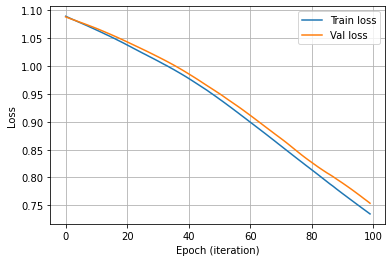

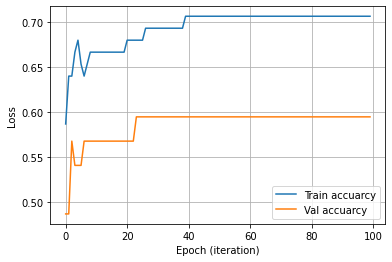

In [15]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Test loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# References for creating this jupyter notebook 

1) https://keras.io/guides/functional_api/

2) https://keras.io/api/models/sequential/

3) https://keras.io/api/models/

4) https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3

**Thanks to Kashyap Patel who helped develop this tutorial!**